In [29]:
#DISSIMILARITY MATRIX GENERATION FOR BINARY ,NUMERICAL AND NOMINAL ATTRIBUTES
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
ds=pd.read_csv("student-mat.csv",sep=',')
ds.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

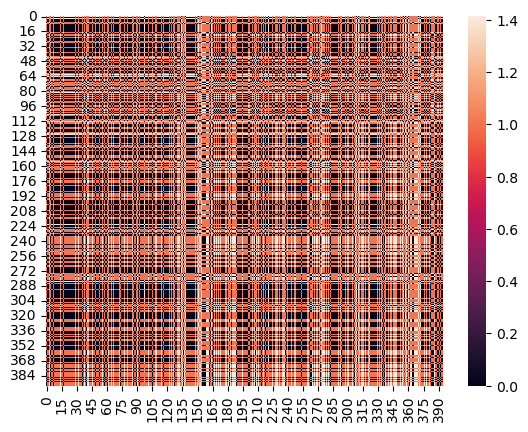

In [33]:
#BINARY ATTRIBUTES
dfs=ds[['schoolsup','famsup','activities','nursery','higher','internet','romantic']]
dfs.head()
ds.info()
dfs=dfs.replace('no',0)
dfs=dfs.replace('yes',1)
dfs.head()
dfs.info()
n=np.array(dfs[['schoolsup','famsup']])
n=n.reshape(-1,2)
n.shape
m=np.array(dfs[['romantic','internet']])
m=m.reshape(-1,2)
m.shape
from scipy.spatial import distance
dist_matrix=distance.cdist(n,m)
dist_matrix.shape
sbs.heatmap(dist_matrix)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Medu        395 non-null    int64
 1   age         395 non-null    int64
 2   Fedu        395 non-null    int64
 3   traveltime  395 non-null    int64
 4   studytime   395 non-null    int64
 5   failures    395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB


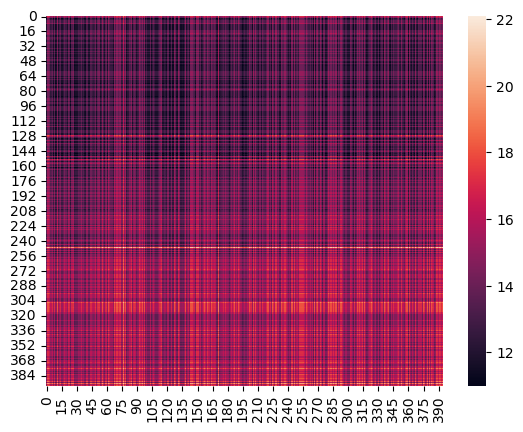

In [34]:
#numerical attributes
numeric=ds[['Medu','age','Fedu','traveltime','studytime','failures']]
numeric.head()
numeric.info()
num1=np.array(numeric[['age','failures']])
num1.reshape(-1,2)
num1.shape
num2=np.array(numeric[['Fedu','Medu']])
num2.reshape(-1,2)
num2.shape
from scipy.spatial import distance
dist_matrix=distance.cdist(num1,num2)
dist_matrix.shape
sbs.heatmap(dist_matrix)
plt.show()

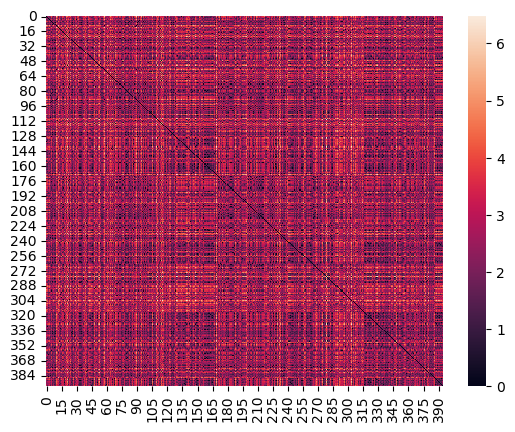

In [32]:
#nominal attributes
nominal=ds[['Mjob','Fjob','reason','guardian']]
nominal=nominal.replace('at_home','home')
nominal=(nominal.astype('category'))
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['guardian']=lb.fit_transform(nominal['guardian'])
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])
nominal['reason']=lb.fit_transform(nominal['reason'])
nominal.head()
nom1=np.array(nominal)
nom1.reshape(-1,2)
nom2=np.array(nominal)
nom2.reshape(-1,2)
from scipy.spatial import distance
dist_matrix=distance.cdist(nom1,nom2)
dist_matrix.shape
sbs.heatmap(dist_matrix)
plt.show()



